In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import pysimul
import time
from math import *
π = np.pi

In [32]:
simul = pysimul.PySimul()
simul['t_pause'] = simul_time = 10000
simul['T'] = kBT = 10
simul['gamma'] = γ = 1000
simul['part_m'] = m = 1
simul.start()
while not simul['pause']:
    simul.sfml_event_poll()
    time.sleep(0.01)

In [33]:
D = kBT / γ
κ = sqrt( simul["reset_rate"] / D )
(acc, samples) = simul["xdist"]
xdist = acc/samples
xdist_max = simul["xdist_max"]
(acc, samples) = simul["rdist"]
rdist = acc/samples

In [31]:
simul.end()

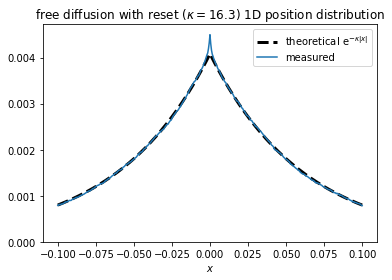

In [34]:
x = np.linspace(-xdist_max,xdist_max,len(xdist))
Δx = x[1]-x[0]
plt.plot(x, Δx*κ/2*np.exp(-κ*np.abs(x)), label="theoretical $\operatorname{e}^{-\kappa|x|}$", color='black', linestyle='dashed', lw=3)
plt.plot(x, xdist, label="measured")
plt.ylim(0,np.max(xdist)*1.05)
plt.xlabel(r"$x$")
plt.title(r"free diffusion with reset ($\kappa={:.1f}$) 1D position distribution".format(κ))
plt.legend()
plt.savefig("langevin-reset-xdist.pdf")

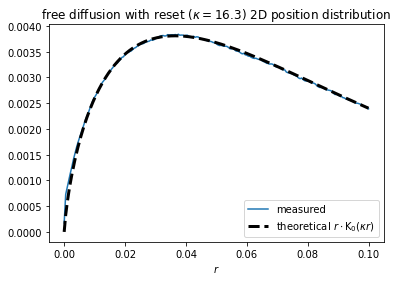

In [35]:
r = np.linspace(0,xdist_max,len(rdist))+1e-100
plt.plot(r, rdist, label="measured")
plt.plot(r, Δx*κ**2*r*scipy.special.kn(0,κ*r), label="theoretical $r\cdot\operatorname{K}_0(\kappa r)$", color='black', linestyle='dashed', lw=3)
plt.xlabel(r"$r$")
plt.title(r"free diffusion with reset ($\kappa={:.1f}$) 2D position distribution".format(κ))
plt.legend()
plt.savefig("langevin-reset-rdist.pdf")